## Programming Exercise 3: Multi-class Classification and Neural Networks

In [119]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io #Used to load the OCTAVE *.mat files

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

### 1 Multi-class Classification

#### 1.1 Dataset 
우리가 여기서 사용할 데이터셋을 불러와보자. neural network를 이용해서 multi-class 이미지의 classification을 해볼 것이다. 

In [120]:
# 데이터를 불러오자. 
datafile = 'data/ex3data1.mat'
# scipy에 loadmat이라는 mat파일을 불러오는 함수를 사용한다. 
mat = scipy.io.loadmat( datafile )
# X, y를 지정해준다. 
X, y = mat['X'], mat['y']

## X와 y가 어떤 값들로 이루어져 있는지 확인해보자. 
#1. X, y의 shape 확인한다. 
#2. X는 이미지, y는 label 정보이다. y가 몇 가지 class의 label로 이루어져 있는지 확인해보자. (np.unique를 쓰자.)

### 코드 시작 ###
print ("X has shape :",X.shape)
print ("y has shape :",y.shape)
np.unique(y)
### 코드 끝 ###

X has shape : (5000, 400)
y has shape : (5000, 1)


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

In [121]:
# X에 2번째 열에 1을 insert 해주자. 
X = np.insert(X, 1, 1, axis=1)
print (X.shape)

(5000, 401)


#### 1.2 Visualizing the data

X를 이미지로, y를 label로 사용할 것이다. 

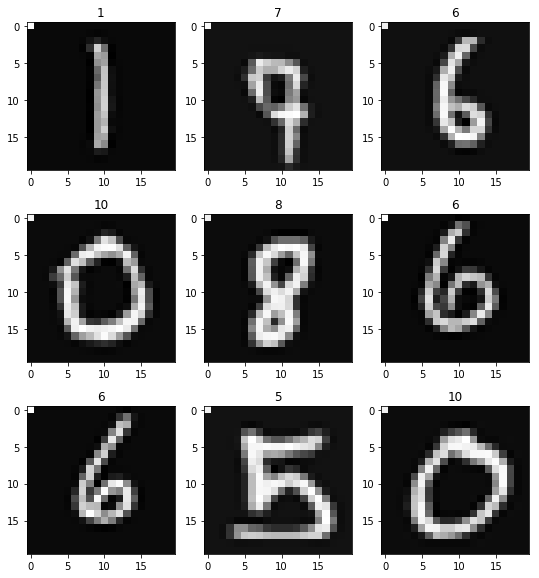

In [122]:
# X, y가 뭐로 이루어져 있는지 확인해보자. 
# random seed는 계속 뽑을 때마다 무작위로 되는 걸 방지하기 위해서 사용한다. 숫자 별로 무작위 값이 지정되어 있다. 
np.random.seed(42)
# 랜덤으로 그래프 그릴 데이터의 index를 5000개 중에 9개를 뽑는다. 
random_indices = np.random.choice(5000, 9)
# 뽑은 index를 사용해서 9개의 값만 따로 저장해준다.
X_sample, y_sample = X[random_indices], y[random_indices]
# 3행, 3열로 그래프를 그릴 예정이다. 
rows, cols = 3, 3
# figure를 만들어준다. 
plt.figure(figsize=(9, 10))
for row in range(rows):
    for col in range(cols):
        order = row * cols + col 
        # 그래프의 행, 열에 해당하는 정보가 들어가면서 생성된다.  
        plt.subplot(rows, cols, order + 1)
        # array를 받아서 이미지로 나타내주는 그래프이다. colormap은 gray로 해주어야 흑백이 나온다. 
        plt.imshow(X_sample[order][1:].reshape([20, 20]).transpose(), cmap='gray')
        # 그래프에 맞는 y값을 매칭시켜준다. 
        plt.title(y_sample[order][0])        

### 2 Neural Networks

#### 2.1 Model representation

In [123]:
# 이미 학습되어 있는 weight 값들을 불러올 거다. 
datafile = 'data/ex3weights.mat'
# 위와 마찬가지로 scipy.io.loadmat으로 불러온다. 
mat = scipy.io.loadmat(datafile)
# 각 layer 별 theta를 theta1, theta2 로 지정해준다. 
theta1, theta2 = mat['Theta1'], mat['Theta2']

# theta의 shape을 확인해보고 shape의 의미를 써보자. 
### 코드 시작 ###
print ("Theta1 has shape :", theta1.shape)
print ("Theta2 has shape :", theta2.shape)
### 코드 끝 ###

Theta1 has shape : (25, 401)
Theta2 has shape : (10, 26)


#### Q. theta1, theta2의 shape이 어떤 의미를 가지고 있나? 숫자가 layer에서 나타내는 각각의 의미를 쓰면 된다.
- theta1 : 
- theta2 : 

#### 2.2 Feedforward Propagation

In [130]:
# logistic regression에서 쓴 sigmoid 함수가 또 필요하다. 
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
    
# forwardpropagate을 하자. 
def forwardpropagate(X,thetas):
    """
    X : input 값. (array)
    Thetas : layer 별로 필요한 theta 값들. (list)
    
    X를 받아서 layer 별로 진행한 뒤에 output을 내놓는 것이 목적이다. 
    """
    ##############################################################################
    # 1. input으로 X를 받는다. 
    #  -> layer를 지날 때마다 값이 계속 바뀌므로 features에 넣고 loop를 돌리는게 낫다. 
    # 2. layer가 지날 때마다 weight(theta)와 연산이 되고 bias가 더해져서 전달된다. 
    #  -> bias는 강의 자료에 나오듯 1을 더해주면 된다. (np.insert) 
    # 3. 마지막 layer에서는 bias가 더해지지 않고 sigmoid 함수가 쓰여서 값을 0 - 1 사이로 만들어준다. 
    ##############################################################################
    features = X
    ### 코드 시작 ###
    ######### 코드의 정확한 설명 필요 #########
    for i in range(len(thetas)):
        theta = thetas[i]
        z = np.dot(features, theta.T)
        a = sigmoid(z)
        if i == len(thetas) - 1:
            return a
        a = np.insert(a, 0, 1, axis=1)
        features = a
    ### 코드 끝 ### 
    
    
# 값을 예측하자. 
def predictNN(X,thetas):
    """
    X : input 값. (array)
    Thetas : layer 별로 필요한 theta 값들. (list)
    """
    ##############################################################################
    # 예측하기 위해선 결과 값을 구해야 한다. 이 식을 위에서 정의했다. 가져다가 쓰자
    # 결과 값 중에 가장 큰 값을 정답이라고 선택하자. 이를 위해서 np.argmax를 사용해야 한다. 
    ##############################################################################
    
    ### 코드 시작 ###
    output = forwardpropagate(X, thetas)
    ######### 왜 1을 더해야 하는지??? #########
    ######### 1을 더한 것을 찾은 건 밑에 혼자 값을 찾아보니 더해야 할 것 같았음 #########
    pred = np.argmax(output, axis = 1) + 1
    return pred
    ### 코드 끝 ###
    

In [125]:
######### 혼자 확인하기 위해 쓴 값 #########
output = forwardpropagate(X, thetas)
print(output)

[[  7.10981315e-05   1.53466107e-03   2.66158075e-03 ...,   3.05613534e-04
    4.73533363e-03   9.96044932e-01]
 [  2.82282665e-04   2.07795331e-03   3.63443038e-03 ...,   1.60820302e-03
    1.69964715e-03   9.96198478e-01]
 [  7.12545519e-05   4.66293754e-03   2.92036300e-02 ...,   5.74544876e-02
    4.97173747e-03   9.36331985e-01]
 ..., 
 [  3.43587293e-02   3.57308643e-03   3.42299356e-02 ...,   3.32585157e-03
    5.47760593e-01   2.50521694e-05]
 [  5.83343808e-04   3.78017033e-04   3.98294561e-04 ...,   1.14372511e-02
    9.64758502e-01   2.57786274e-04]
 [  4.31065664e-05   4.48532456e-04   2.07003245e-05 ...,   5.81179697e-03
    5.79991095e-01   1.23439165e-01]]


In [129]:
######### 혼자 확인하기 위해 쓴 값 #########
thetas = [theta1, theta2]
pred = predictNN(X, thetas)
print(pred)
pred = np.reshape(predictNN(X, thetas), [y.shape[0], 1])
print(pred)
print(y)

[10 10 10 ...,  9  9  9]
[[10]
 [10]
 [10]
 ..., 
 [ 9]
 [ 9]
 [ 9]]
[[10]
 [10]
 [10]
 ..., 
 [ 9]
 [ 9]
 [ 9]]


In [128]:
# theta를 list에 넣자. 
thetas = [theta1, theta2]
# 위에서 정의한 predictNN으로 예측해보자. y랑 비교할 건데, shape이 맞는지 확인하자.!
# 나머지 correct, accuracy 항들은 y랑 값 비교해서 구하면 된다. (어렵지 않음.)
pred = np.reshape(predictNN(X, thetas), [y.shape[0], 1])
######### correct와 accuracy 의 정확한 차이 설명 필요 #########
correct = (pred == y)
accuracy = np.mean(correct)
print("Training set accuracy: %0.1f%%"%(100*accuracy))
print("Accuracy 정답과의 차이 값 : {}".format(rel_error(accuracy, 0.975)))

Training set accuracy: 97.3%
Accuracy 정답과의 차이 값 : 0.0012322858903265341


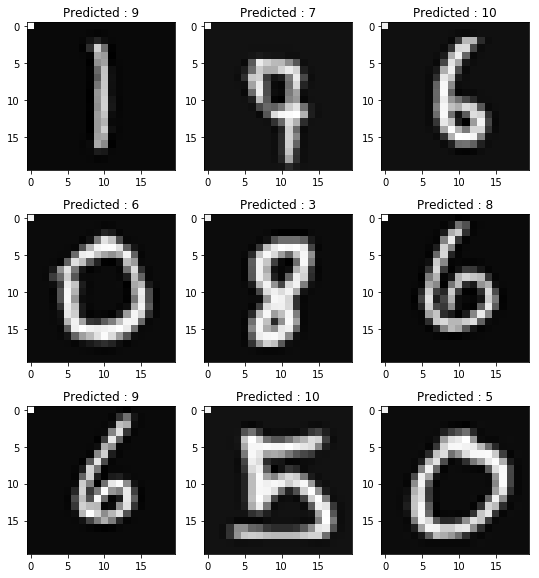

In [137]:
# 자, 이제 좋은 모델을 구한건 아니지만 weight가 학습이 되면 좋은 모델 역할을 할 수 있다는 사실을 알았다.
# 좋은 weight를 구하는 방법은 다음 시간에 보도록 하고 
# 모델로 구한 결과가 제 구실을 하는지 몇 개 sample을 뽑아서 보도록 하자. 
# 대부분 맞으니 틀린거만 보도록 하겠다. 

# 틀린 결과만 다 모은 뒤에 9개만 뽑아서 보여보자. 
# 아래 이전 수업 때 배운 함수 써보는 겸에서 해보자. np.where로 틀린 결과만 가져오면 된다. 
### 코드 시작 ###

incorrect_examples_indices = np.where(correct == False)[0]

### 코드 끝 ###

# 랜덤으로 그래프 그릴 데이터의 index를 5000개 중에 9개를 뽑는다. 
np.random.seed(20)
random_indices = np.random.choice(incorrect_examples_indices, 9)
# 뽑은 index를 사용해서 9개의 값만 따로 저장해준다. 
X_incorrect_sample, y_incorrect_sample = X[random_indices], pred[random_indices]
# 3행, 3열로 그래프를 그릴 예정이다. 
rows, cols = 3, 3
# figure를 만들어준다. 
plt.figure(figsize=(9, 10))
for row in range(rows):
    for col in range(cols):
        order = row * cols + col 
        # 그래프의 행, 열에 해당하는 정보가 들어가면서 생성된다.  
        plt.subplot(rows, cols, order + 1)
        # array를 받아서 이미지로 나타내주는 그래프이다. colormap은 gray로 해주어야 흑백이 나온다. 
        plt.imshow(X_sample[order][1:].reshape([20, 20]).transpose(), cmap='gray')
        # 그래프에 맞는 y값을 매칭시켜준다. 
        plt.title("Predicted : {}".format(y_incorrect_sample[order][0]))